In [6]:
import pandas as pd
from prophet import Prophet

import seaborn as sns
import matplotlib.pyplot as plt

from prophet.plot import plot_plotly, plot_components_plotly

import plotly.io as pio
pio.renderers.default = "notebook"

plt.style.use('Solarize_Light2')

In [7]:
df = pd.read_csv('../data/cleaned_sensors_dwd_train.csv', index_col=0)

In [8]:
df

location_id            timestamp       city        lat       lon  \
0                  2  2020-01-01 00:00:00  Frankfurt  50.042000  8.436000   
1                  2  2020-01-01 01:00:00  Frankfurt  50.042000  8.436000   
2                  2  2020-01-01 02:00:00  Frankfurt  50.042000  8.436000   
3                  2  2020-01-01 03:00:00  Frankfurt  50.042000  8.436000   
4                  2  2020-01-01 04:00:00  Frankfurt  50.042000  8.436000   
...              ...                  ...        ...        ...       ...   
2807035           94  2021-12-31 19:00:00  Frankfurt  50.145034  8.794068   
2807036           94  2021-12-31 20:00:00  Frankfurt  50.145034  8.794068   
2807037           94  2021-12-31 21:00:00  Frankfurt  50.145034  8.794068   
2807038           94  2021-12-31 22:00:00  Frankfurt  50.145034  8.794068   
2807039           94  2021-12-31 23:00:00  Frankfurt  50.145034  8.794068   

               PM10   PM10_std       PM2p5  PM2p5_std  humidity_sensors  ...  \
0        212.110833  24.278724  140.574167  16.827501         96.000000  ...   
1        196.873043  24.933247  129.469130  16.857172         96.100000  ...   
2        188.258182  36.770146  124.460455  26.337616         96.633333  ...   
3        166.444500  30.844667  105.790000  21.422815         97.600000  ...   
4        101.033600  18.991551   62.073600  12.735376         97.550000  ...   
...             ...        ...         ...        ...               ...  ...   
2807035   10.916667   2.073651    7.566667   0.995483               NaN  ...   
2807036   10.176667   2.014474    6.306667   0.447109               NaN  ...   
2807037   10.386667   1.574061    6.823333   0.920471               NaN  ...   
2807038    9.858000   2.431033    7.612000   1.784312               NaN  ...   
2807039   22.005000   8.854994   16.855000   7.188023               NaN  ...   

         temperature_sensors  temperature_std   WRTR  humidity_dwd  precip  \
0                   2.700000              NaN -999.0          90.0     0.0   
1                   2.400000              NaN    0.0          90.0     0.0   
2                   2.133333         0.057735    0.0          92.0     0.0   
3                   1.850000         0.057735 -999.0          93.0     0.0   
4                   1.650000         0.212132    0.0          90.0     0.0   
...                      ...              ...    ...           ...     ...   
2807035            11.750000         0.083666    0.0          83.0     0.0   
2807036            11.900000         0.126491    0.0          83.0     0.0   
2807037            11.966667         0.051640 -999.0          82.0     0.0   
2807038            12.083333         0.098319    0.0          83.0     0.0   
2807039            12.133333         0.121106    0.0          84.0     0.0   

         pressure_dwd  pressure_sealevel  temperature_dwd  wind_direction  \
0              1023.1             1036.5              0.0            40.0   
1              1022.9             1036.3              0.1            20.0   
2              1022.8             1036.2             -1.1            70.0   
3              1022.3             1035.7             -0.4            80.0   
4              1022.1             1035.4              0.2            50.0   
...               ...                ...              ...             ...   
2807035        1011.2             1023.9             10.6           180.0   
2807036        1011.9             1024.6             10.9           200.0   
2807037        1012.2             1024.9             11.2           200.0   
2807038        1012.3             1025.0             11.6           210.0   
2807039        1012.8             1025.5             11.5           220.0   

         wind_speed  
0               2.7  
1               2.8  
2               2.2  
3               1.6  
4               2.0  
...             ...  
2807035         2.6  
2807036         3.5  
2807037         3.3  
2807038         3.0  
2807039         4.2

In [9]:
df_prophet = df.query('city == "Bremen"')
df_prophet = df_prophet[['timestamp','PM2p5','location_id']]
df_prophet.rename(columns={'timestamp': 'ds', 'PM2p5': 'y'}, inplace=True)

df_prophet.dropna(inplace=True)

location_list_bremen = df_prophet['location_id'].unique().tolist()

df_prophet.location_id.nunique()
#df_prophet.isna().sum()
#df_prophet

27

In [10]:
prophet_models_per_location = {}

for n, location_id in enumerate(location_list_bremen):
    print('-----'*10)
    print(f'no: {n + 1}, location_id: {location_id}')
    df_location = df_prophet[df_prophet['location_id'] == location_id]
    df_location.drop('location_id', axis=1, inplace=True)
    model = Prophet()  #yearly_seasonality=True
    model.fit(df_location)

    prophet_models_per_location[location_id] = model

--------------------------------------------------
no: 1, location_id: 125


/Users/nicole/neuefische/air-pollution/.venv/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



--------------------------------------------------Initial log joint probability = -303.884

no: 2, location_id: 126
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       53231.7    0.00297359        2796.3           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       53273.5     0.0293768       2286.41           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       53295.7    0.00662022       1907.78           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       53306.4    0.00242887       630.851       3.574      0.3574      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       53313.6   0.000274449       278.373           1           1  

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -2787.11
--------------------------------------------------    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       60085.2   0.000838319       2306.11           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       60106.5    0.00112076       1727.46      0.5765      0.5765      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       60115.6   0.000456366        750.72           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       60120.5    0.00284431       3398.07           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       60125.2    0.00181386       1321.21           1           1      578   
    Iter      

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -2825.62
--------------------------------------------------
no: 7, location_id: 136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         67267   0.000807796       33943.3      0.6434      0.6434      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       67323.1   1.98933e-05       2494.91      0.8076      0.8076      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       67334.5   0.000996726       981.708      0.6628      0.6628      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       67340.5     0.0107874       5951.61           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       67345.3   0.000240867       392.664           1           1  

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


--------------------------------------------------
no: 8, location_id: 137
Initial log joint probability = -2431.16
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       41354.8    0.00407014       1446.74           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       41417.7   0.000888514       468.143      0.5991      0.5991      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         41472   0.000339948       643.777      0.5688      0.5688      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       41486.1   0.000251284       326.728      0.1714      0.1714      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       41492.5   0.000637307       1010.61      0.3261      0.3261  

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -2802.07
--------------------------------------------------
no: 20, location_id: 177
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       58433.4   0.000105708       515.161           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         58459    0.00424326       2191.96      0.1909           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         58466   0.000417045       1060.01       0.726       0.726      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       58469.4    0.00198302       1889.94           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       58471.8   2.72489e-05       465.641   4.744e-08       0.001 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -2692.15
--------------------------------------------------    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       42373.7   0.000444587       345.157      0.9094      0.9094      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       42387.3   0.000121019       1402.45      0.2394      0.2394      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       42391.1     0.0171378       1396.23           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       42394.7   8.86451e-05       233.715      0.6152      0.6152      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       42395.9     0.0103354       1140.78           1           1      605   
    Iter      

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -181.409
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       19801.5    0.00581634       1092.19      0.2996      0.2996      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       19851.9    0.00235261       273.753           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       19853.7   9.56224e-05        108.46   2.222e-06       0.001      387  LS failed, Hessian reset 
     299       19853.9    0.00459576       151.388           1           1      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       19855.7   7.46246e-05       123.516   5.363e-07       0.001      533  LS failed, Hessian reset 
     399       19856.2    0.00193073       144.455       1.331     0.01331      582   
    Iter      log pro

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -315.114
--------------------------------------------------
no: 26, location_id: 130
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       24770.1     0.0177919       336.701      0.3741           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       24815.6     0.0179264       391.908           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       24831.1    0.00765774       339.804      0.2302      0.9995      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         24841     0.0115605       265.287           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       24845.4    0.00337749       388.309      0.3917      0.8724 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -219.808
--------------------------------------------------    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       25244.4     0.0111181       286.091           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       25283.9    0.00994388       638.169           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       25297.8    0.00618855       310.999      0.7874     0.07874      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       25307.5    0.00201847       144.342           1           1      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     485         25314   0.000142762        161.01   2.916e-07       0.001      653  LS failed, Hessi

In [15]:
prophet_forecasts_per_location = {}
for location_id in location_list_bremen[:5]:
    print('-----'*10)
    print(f'location_id: {location_id}')
    model = prophet_models_per_location[location_id]
    
    future = model.make_future_dataframe(periods=480, freq='H')
    forecast = model.predict(future)

    prophet_forecasts_per_location[location_id] = forecast

--------------------------------------------------
location_id: 125
--------------------------------------------------
location_id: 126
--------------------------------------------------
location_id: 128
--------------------------------------------------
location_id: 129
--------------------------------------------------
location_id: 132


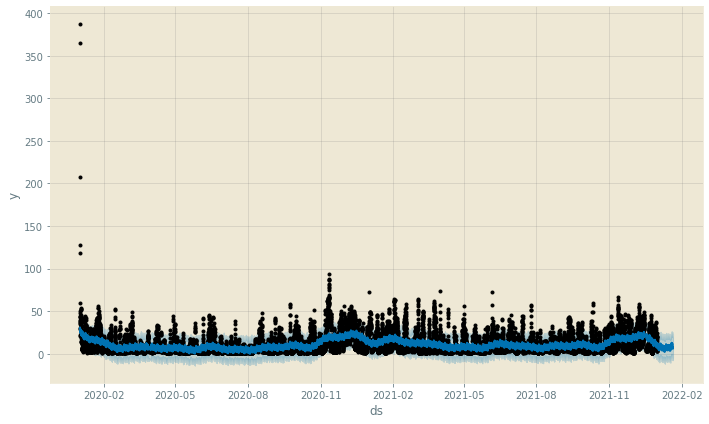

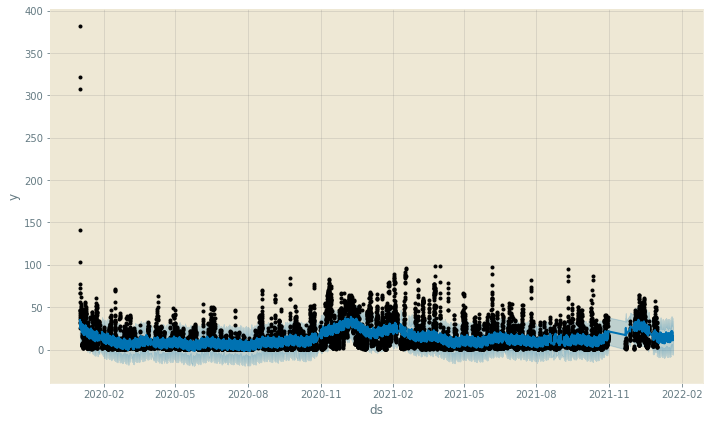

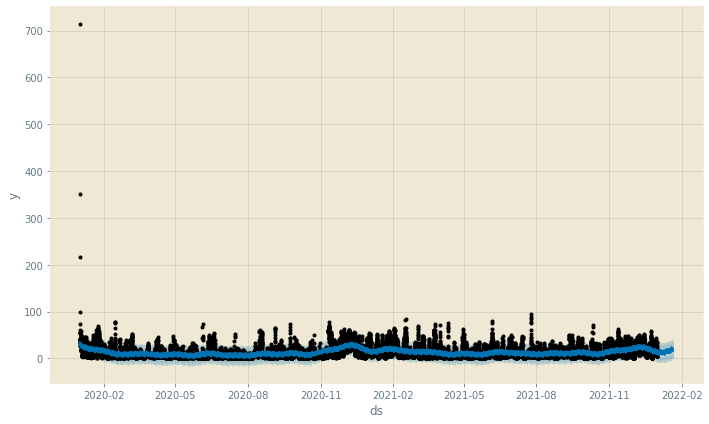

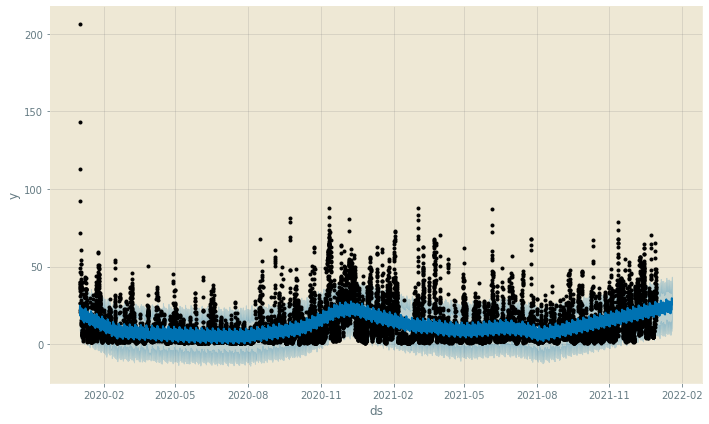

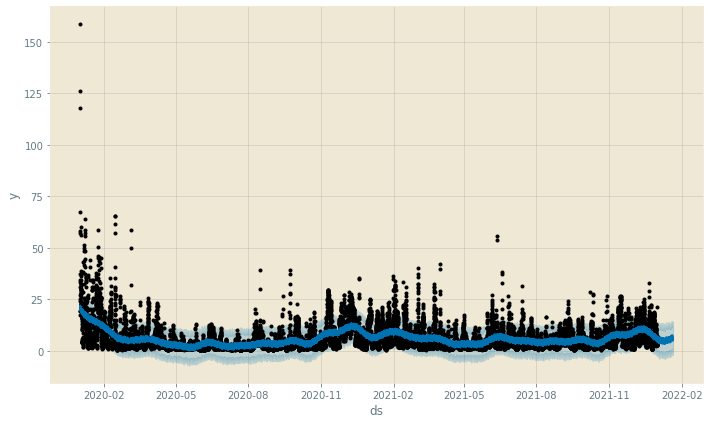

In [17]:
for location_id in location_list_bremen[:5]:
    model = prophet_models_per_location[location_id]
    fig1 = model.plot(prophet_forecasts_per_location[location_id])


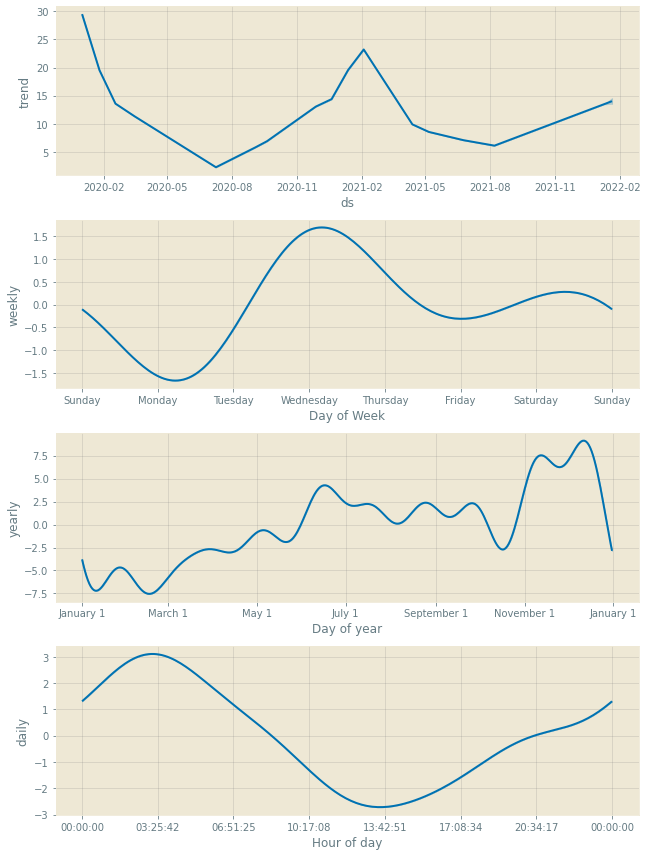

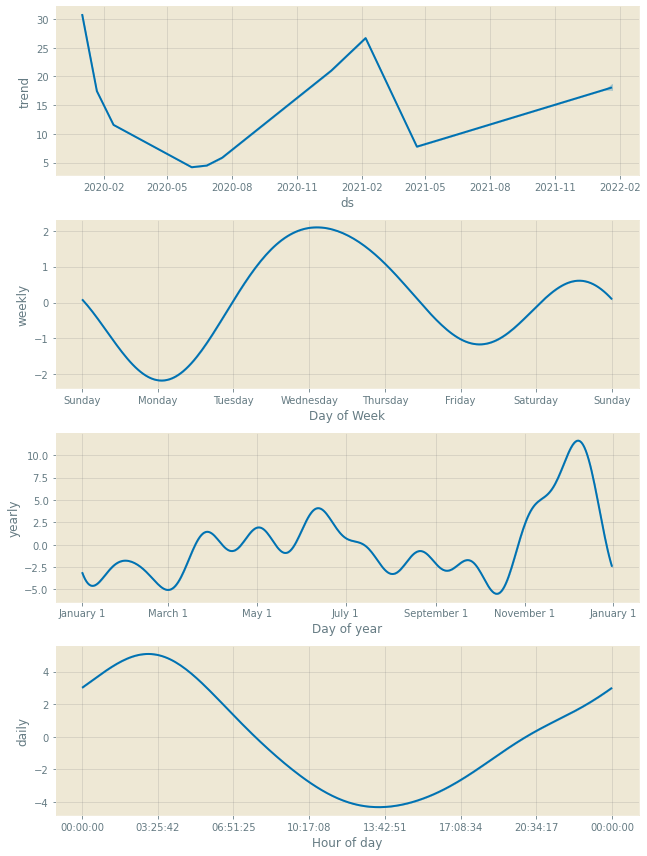

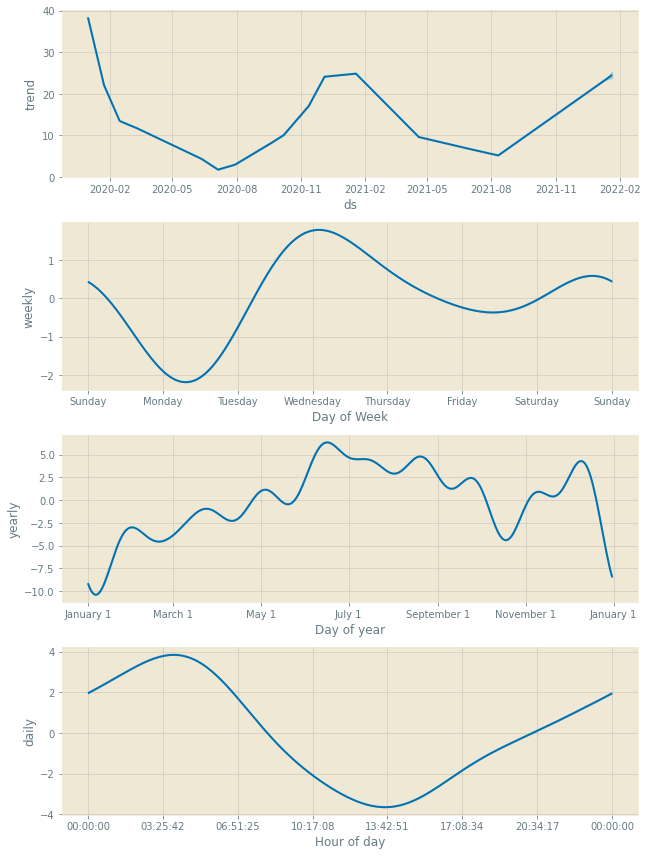

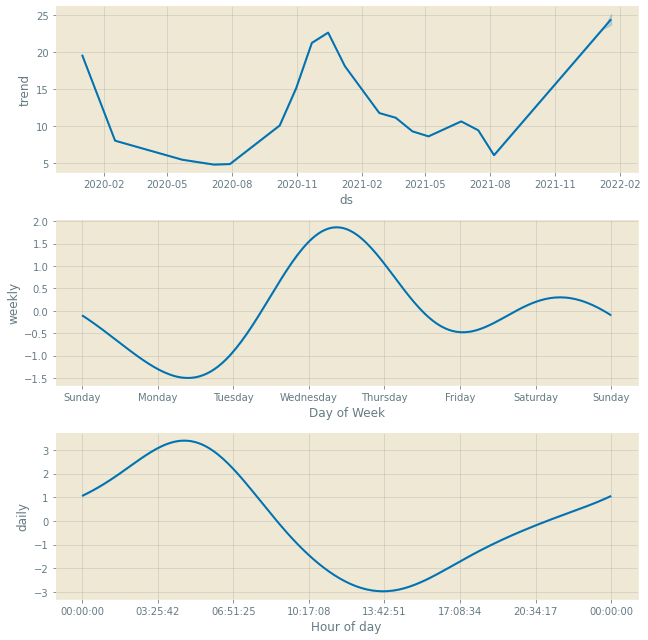

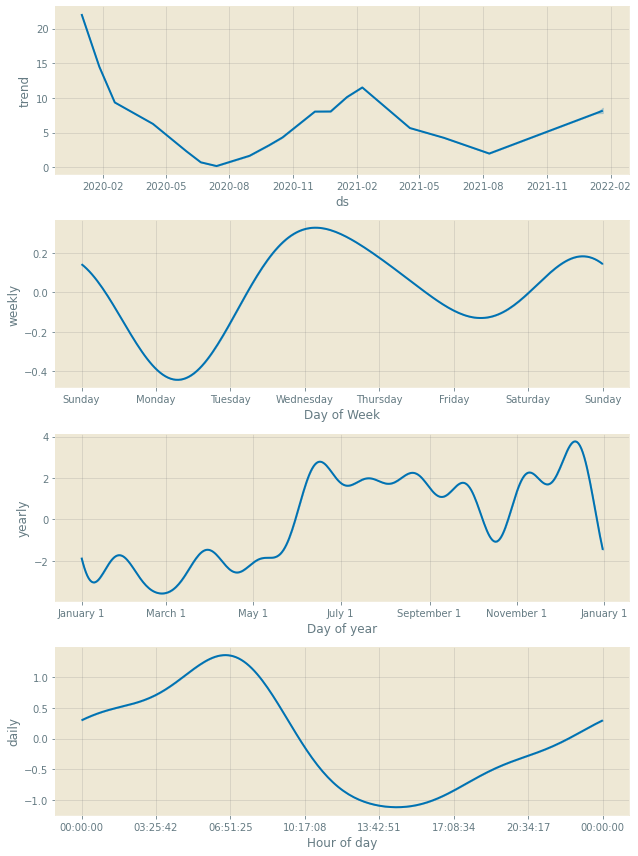

In [18]:
for location_id in location_list_bremen[:5]:
    model = prophet_models_per_location[location_id]
    fig2 = model.plot_components(prophet_forecasts_per_location[location_id])

In [14]:
#for location_id in location_list_bremen:
model = prophet_models_per_location[125]
plot_plotly(model, forecast) 